Inicializar variables y cargar el dataset

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks


### Cargar dataset
from google.colab import drive
drive.mount('/content/gdrive')
import os

YOLOv5 🚀 v7.0-231-gc2f131a Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)
Mounted at /content/gdrive


In [ ]:
#Descomprimir dataset
!unzip '/content/train_data.zip' -d '/content'

Crear archivo .yaml (subir archivo a la carpeta data de yolov5)

In [ ]:
path: /content/train_data  # dataset root dir
train: /content/train_data/images/train/  # train images (relative to 'path') 128 images
val: /content/train_data/images/val/  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
nc: 11  # number of classes
names: ['a','bike','motobike','person','luzverde','luzamarilla','luzroja','30km','60km','90km','vehículo']  # class names

### YOLOv5
Entrenamiento del algoritmo
Se seleccionan epochs y batch size para el entreno

In [ ]:
%cd '/content/yolov5'
!python train.py --img 416 --batch 16 --epochs 80 --data 'customdata.yaml' --weights yolov5s.pt --cache

### Probar algoritmo
Para probar el algoritmo se cargaron varias imágenes, se reescalaron y se pasaron por la red para ver su detección de objetos

In [ ]:
import cv2
import matplotlib.pyplot as plt
%cd '/content/yolov5'
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.2 --source '/content/u.jpeg'

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.2 --source '/content/abuecalle.jpeg'

In [ ]:
%cd '../'
img_ = cv2.imread("/content/ejem2.jpeg", 0)
img_e=cv2.resize(img_, (416,416), interpolation=cv2.INTER_NEAREST)
e = cv2.GaussianBlur(img_e,(3,3), 0)
cv2.imwrite("ejem3.jpeg",e)
%cd '/content/yolov5'
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.1 --source '/content/ejem3.jpeg'

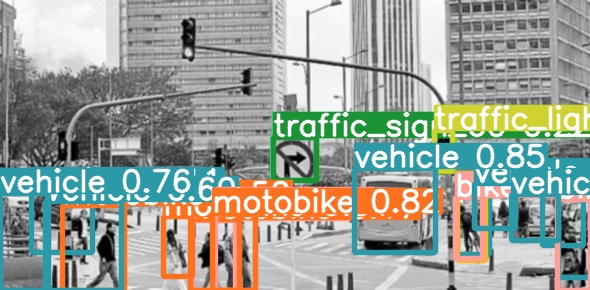

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp76/ejemplo2.jpg', width=416)

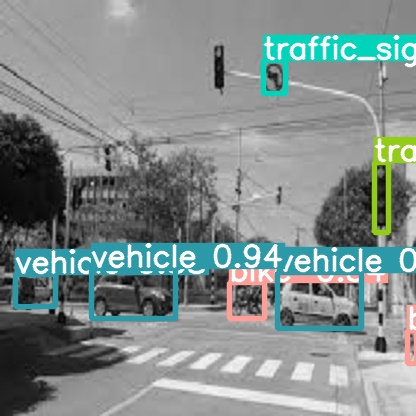

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp77/ejem3.jpeg', width=416)

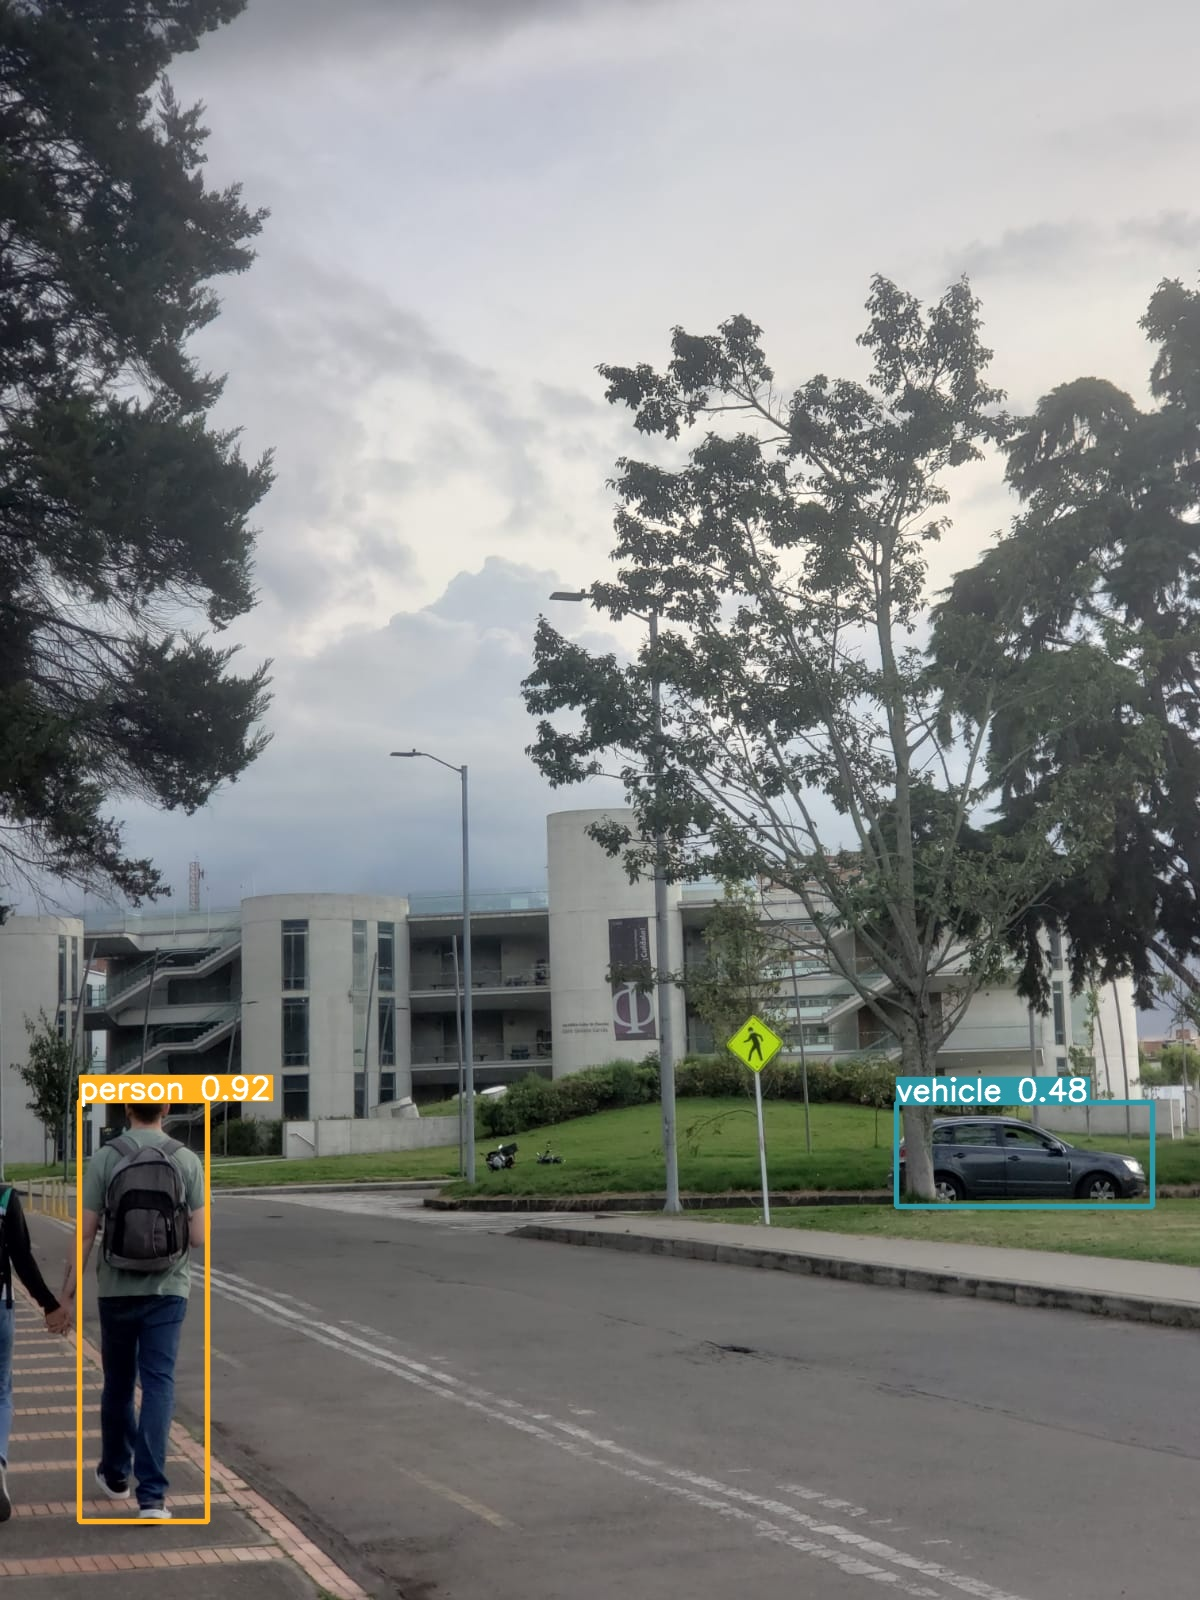

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp18/u.jpeg', width=416)

In [ ]:
from scipy import misc
from scipy import signal
import numpy as np
%cd '../'
img = cv2.imread("/content/abuecalle.jpeg", 1)
img2=cv2.resize(img, (416,416), interpolation=cv2.INTER_NEAREST)

b = cv2.GaussianBlur(img,(3,3), 0)

cv2.imwrite("abuecalle2.jpeg",b)
%cd '/content/yolov5'
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.1 --source '/content/abuecalle2.jpeg'

/content
/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/abuecalle2.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-231-gc2f131a Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/abuecalle2.jpeg: 416x320 2 vehicles, 46.2ms
Speed: 0.4ms pre-process, 46.2ms inference, 80.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp78


### Pruebas con video
Ahora se prueba el algoritmo con videos en formato mp4

In [ ]:
%cd '/content/yolov5'
!python detect.py --weights '/content/best.pt' --img-size 1920 1080 --conf 0.8 --source '/content/PruebaYoloNoche.mp4'

In [ ]:
from IPython.display import HTML

video_url = '/content/yolov5/runs/detect/exp65/PruebaYolo.mp4'  # Reemplaza 'URL_DEL_VIDEO' con la URL del video que desees reproducir
HTML(f'<iframe width="560" height="315" src="{video_url}" frameborder="0" allowfullscreen></iframe>')


## Resultados del entrenamiento

/content
(1200, 2400)


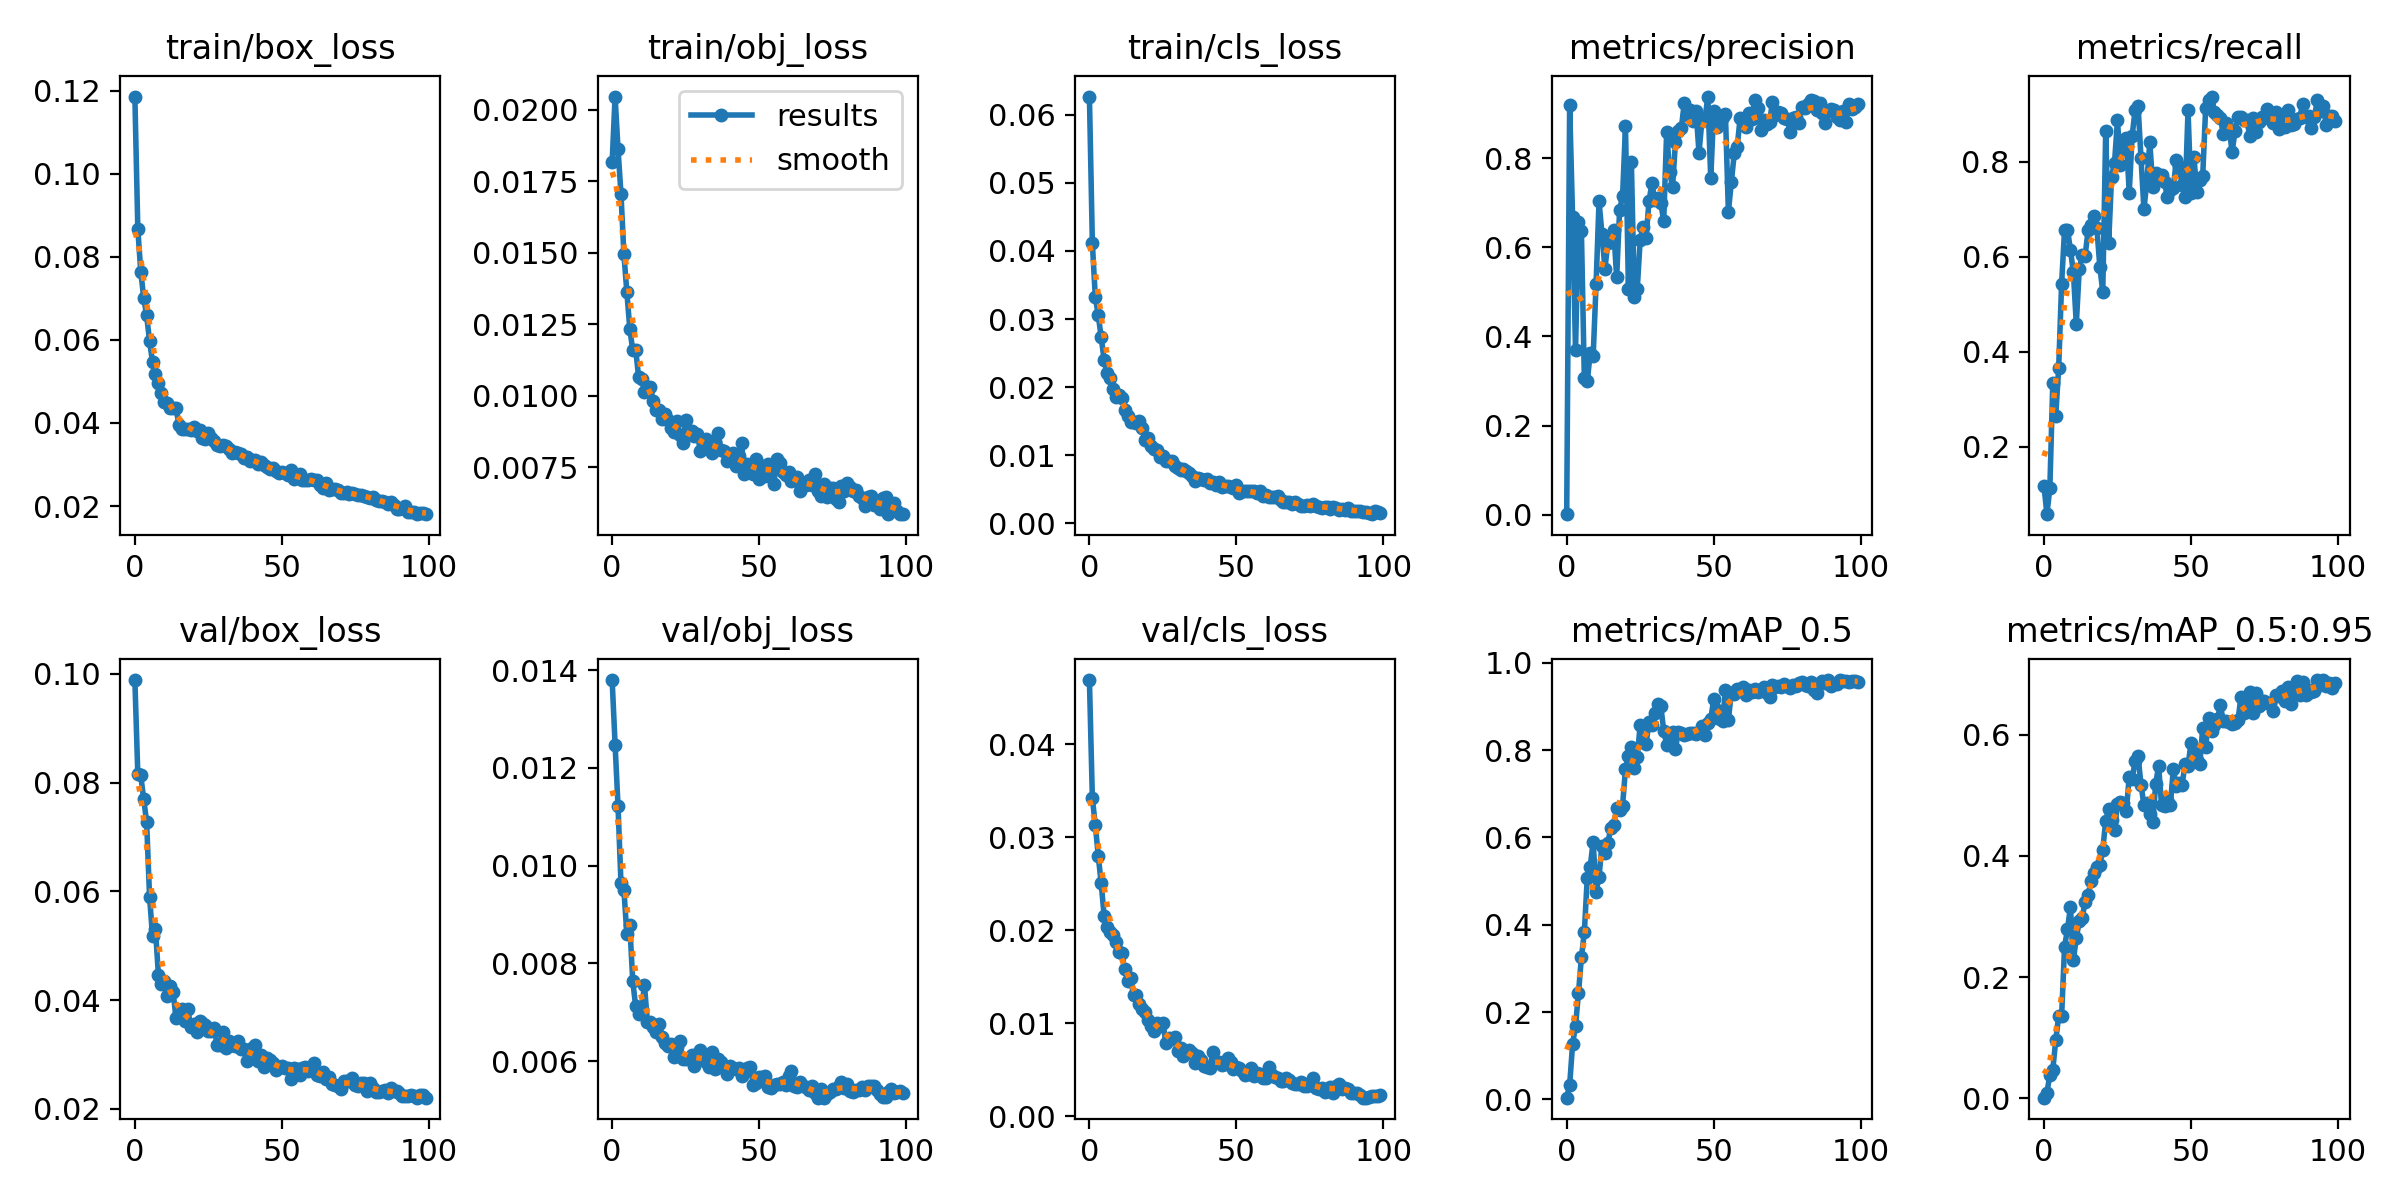

In [ ]:
#from utils.plots import plot_results
%cd '/content'
a=cv2.imread("/content/results.png",0)
print(a.shape)
display.Image(filename='/content/results.png', width=1000)